# Full Rank Markov and Geographic Rank Markov 

**Author: Wei Kang <weikang9009@gmail.com>**

In [1]:
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # ignore NumbaDeprecationWarning: gh-pysal/libpysal#560
    import libpysal as ps

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import geopandas as gpd

## Full Rank Markov

In [2]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # ignore NumbaDeprecationWarning: gh-pysal/libpysal#560
    from giddy.markov import FullRank_Markov

In [3]:
income_table = pd.read_csv(ps.examples.get_path("usjoin.csv"))
income_table.head()

Name  STATE_FIPS  1929  1930  1931  1932  1933  1934  1935  1936  \
0     Alabama           1   323   267   224   162   166   211   217   251   
1     Arizona           4   600   520   429   321   308   362   416   462   
2    Arkansas           5   310   228   215   157   157   187   207   247   
3  California           6   991   887   749   580   546   603   660   771   
4    Colorado           8   634   578   471   354   353   368   444   542   

   ...   2000   2001   2002   2003   2004   2005   2006   2007   2008   2009  
0  ...  23471  24467  25161  26065  27665  29097  30634  31988  32819  32274  
1  ...  25578  26232  26469  27106  28753  30671  32552  33470  33445  32077  
2  ...  22257  23532  23929  25074  26465  27512  29041  31070  31800  31493  
3  ...  32275  32750  32900  33801  35663  37463  40169  41943  42377  40902  
4  ...  32949  34228  33963  34092  35543  37388  39662  41165  41719  40093  

[5 rows x 83 columns]

In [4]:
pci = income_table[list(map(str, range(1929, 2010)))].values
pci

array([[  323,   267,   224, ..., 31988, 32819, 32274],
       [  600,   520,   429, ..., 33470, 33445, 32077],
       [  310,   228,   215, ..., 31070, 31800, 31493],
       ...,
       [  460,   408,   356, ..., 29769, 31265, 31843],
       [  673,   588,   469, ..., 35839, 36594, 35676],
       [  675,   585,   476, ..., 43453, 45177, 42504]])

In [5]:
m = FullRank_Markov(pci)
m.ranks

The Markov Chain is irreducible and is composed by:
1 Recurrent class (indices):
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
0 Transient classes.
The Markov Chain has 0 absorbing states.


array([[45, 45, 44, ..., 41, 40, 39],
       [24, 25, 25, ..., 36, 38, 41],
       [46, 47, 45, ..., 43, 43, 43],
       ...,
       [34, 34, 34, ..., 47, 46, 42],
       [17, 17, 22, ..., 25, 26, 25],
       [16, 18, 19, ...,  6,  6,  7]])

In [6]:
m.transitions

array([[66.,  5.,  5., ...,  0.,  0.,  0.],
       [ 8., 51.,  9., ...,  0.,  0.,  0.],
       [ 2., 13., 44., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ..., 40., 17.,  0.],
       [ 0.,  0.,  0., ..., 15., 54.,  2.],
       [ 0.,  0.,  0., ...,  2.,  1., 77.]])

Full rank Markov transition probability matrix

In [7]:
m.p

array([[0.825 , 0.0625, 0.0625, ..., 0.    , 0.    , 0.    ],
       [0.1   , 0.6375, 0.1125, ..., 0.    , 0.    , 0.    ],
       [0.025 , 0.1625, 0.55  , ..., 0.    , 0.    , 0.    ],
       ...,
       [0.    , 0.    , 0.    , ..., 0.5   , 0.2125, 0.    ],
       [0.    , 0.    , 0.    , ..., 0.1875, 0.675 , 0.025 ],
       [0.    , 0.    , 0.    , ..., 0.025 , 0.0125, 0.9625]])

Full rank mean first passage times

In [8]:
m.mfpt

array([[  48.        ,   87.96280048,   68.1089084 , ...,  443.76689275,
         518.31000749, 1628.59025557],
       [ 225.92564594,   48.        ,   78.75804364, ...,  440.0173313 ,
         514.56045127, 1624.84070661],
       [ 271.55443692,  102.484092  ,   48.        , ...,  438.93288204,
         513.47599512, 1623.75624059],
       ...,
       [ 727.11189921,  570.15910508,  546.61934646, ...,   48.        ,
         117.41906375, 1278.96860316],
       [ 730.40467469,  573.45179415,  549.91216045, ...,   49.70722573,
          48.        , 1202.06279368],
       [ 754.8761577 ,  597.92333477,  574.38361779, ...,   43.23574191,
         104.9460425 ,   48.        ]])

In [9]:
m.sojourn_time

array([ 5.71428571,  2.75862069,  2.22222222,  1.77777778,  1.66666667,
        1.73913043,  1.53846154,  1.53846154,  1.53846154,  1.42857143,
        1.42857143,  1.56862745,  1.53846154,  1.40350877,  1.29032258,
        1.21212121,  1.31147541,  1.37931034,  1.29032258,  1.25      ,
        1.15942029,  1.12676056,  1.25      ,  1.17647059,  1.19402985,
        1.08108108,  1.19402985,  1.25      ,  1.25      ,  1.14285714,
        1.33333333,  1.26984127,  1.25      ,  1.37931034,  1.42857143,
        1.31147541,  1.26984127,  1.25      ,  1.31147541,  1.25      ,
        1.19402985,  1.25      ,  1.53846154,  1.6       ,  1.86046512,
        2.        ,  3.07692308, 26.66666667])

In [10]:
df_fullrank = pd.DataFrame(
    np.c_[m.p.diagonal(), m.sojourn_time],
    columns=["Staying Probability", "Sojourn Time"],
    index=np.arange(m.p.shape[0]) + 1,
)
df_fullrank.head()

Staying Probability  Sojourn Time
1               0.8250      5.714286
2               0.6375      2.758621
3               0.5500      2.222222
4               0.4375      1.777778
5               0.4000      1.666667

array([[<Axes: >, <Axes: >]], dtype=object)

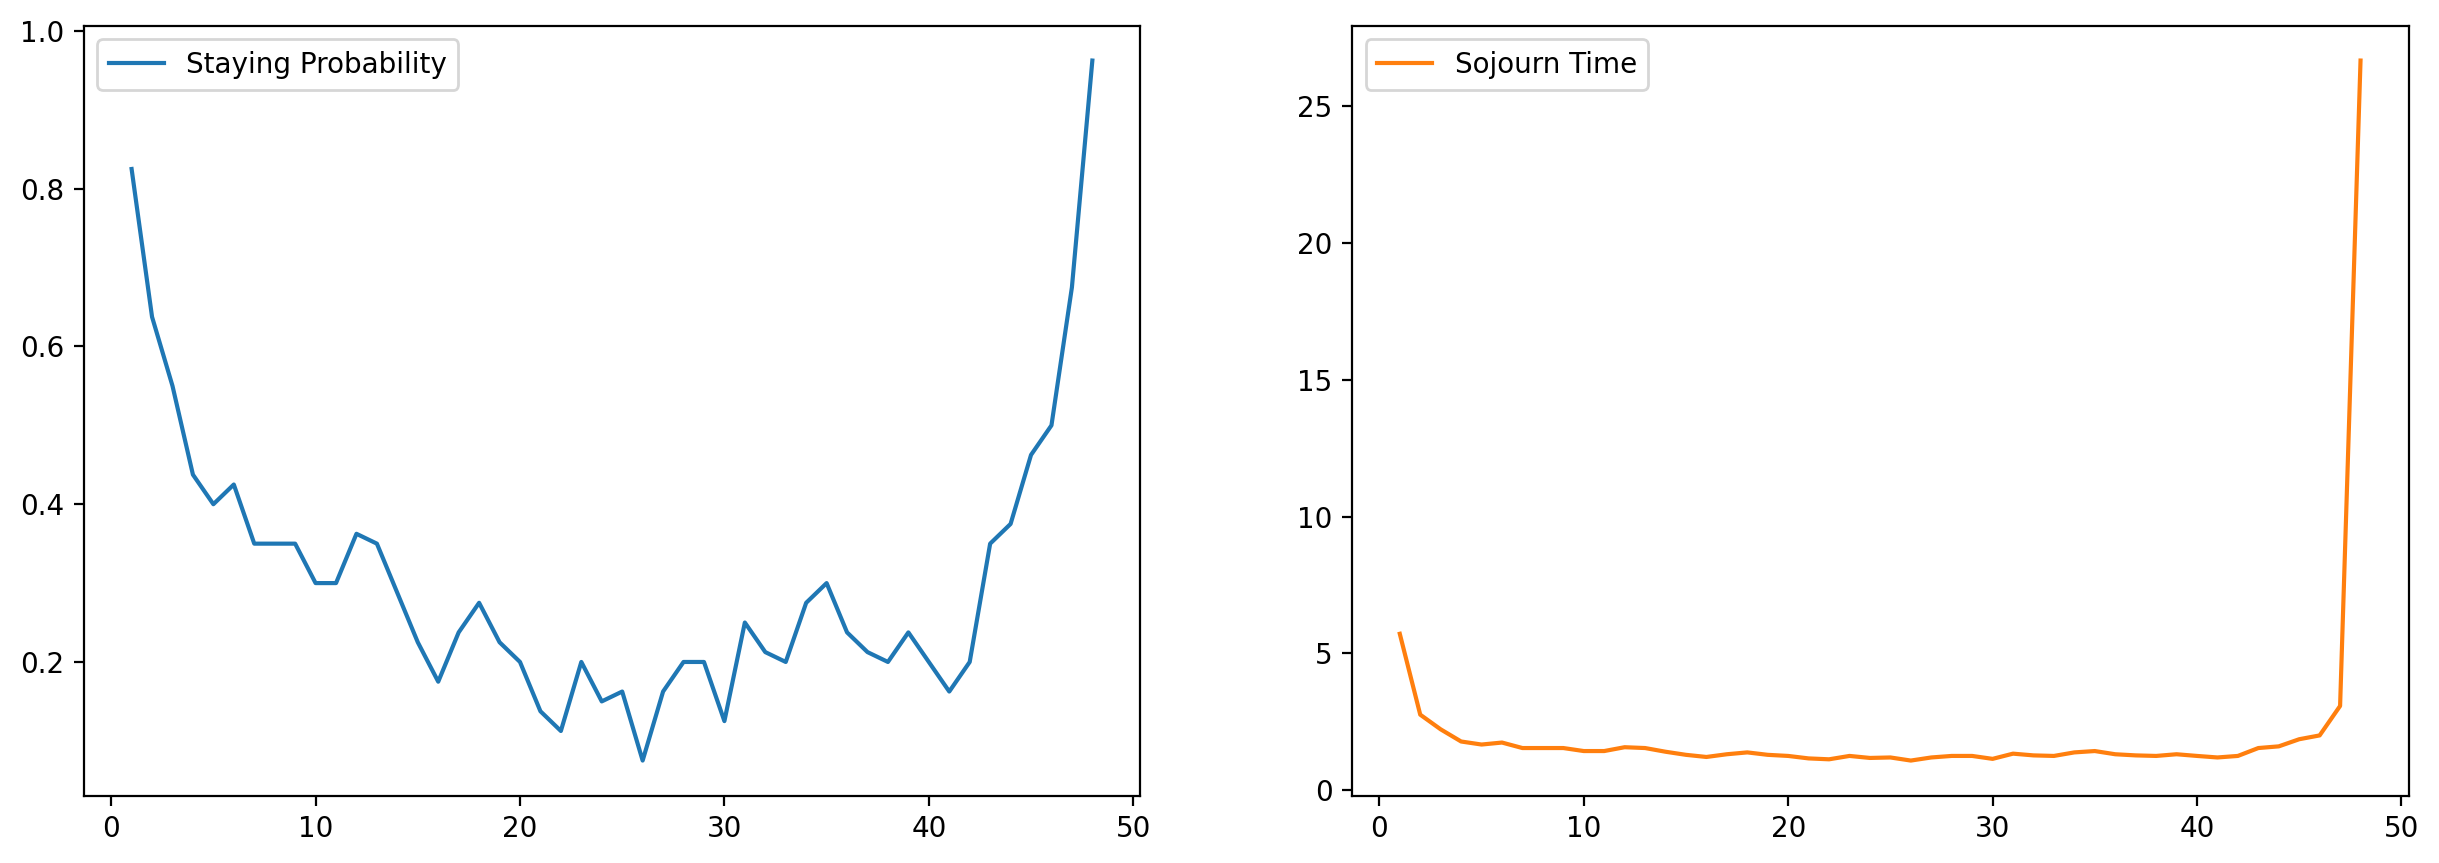

In [11]:
df_fullrank.plot(subplots=True, layout=(1, 2), figsize=(15, 5))

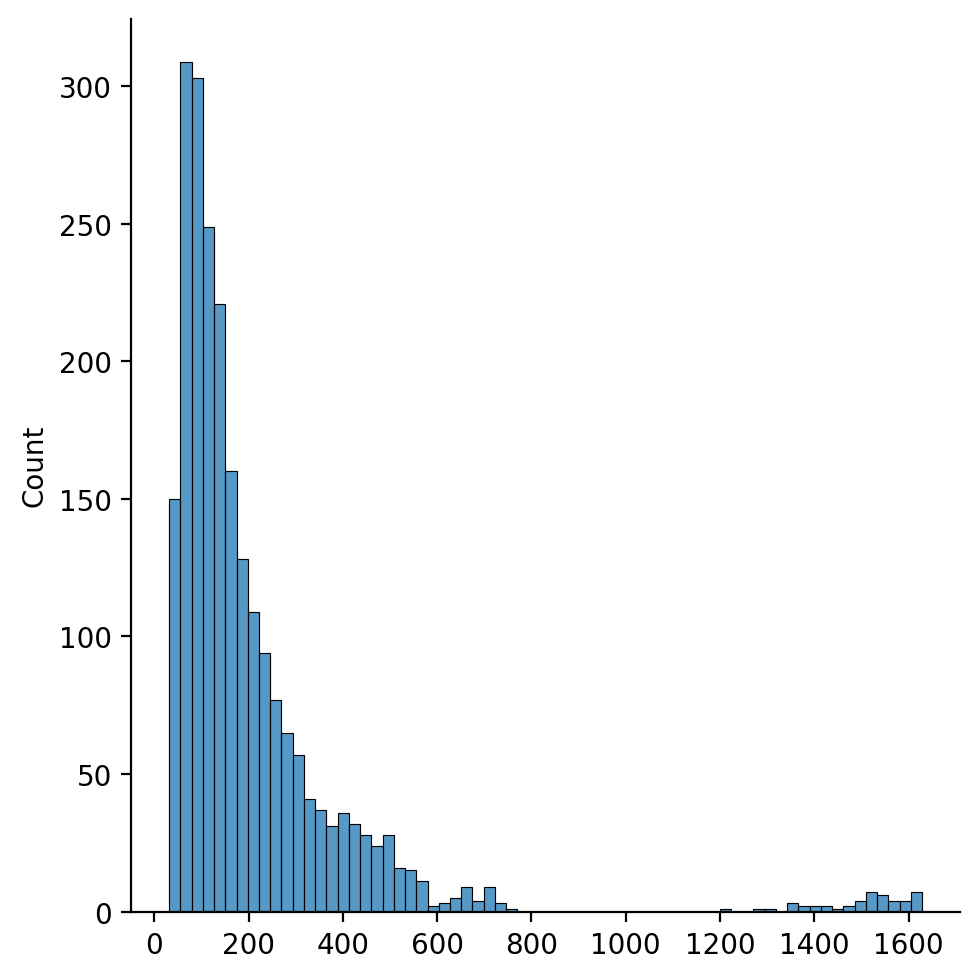

In [12]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # ignore -- seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated
    # and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

    # ignore -- seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated
    # and will be removed in a future version. Convert inf values to NaN before operating instead.

    sns.displot(m.mfpt.flatten(), kde=False)

## Geographic Rank Markov

In [13]:
from giddy.markov import GeoRank_Markov, Markov, sojourn_time

gm = GeoRank_Markov(pci)

The Markov Chain is irreducible and is composed by:
1 Recurrent class (indices):
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47]
0 Transient classes.
The Markov Chain has 0 absorbing states.


In [14]:
gm.transitions

array([[38.,  0.,  8., ...,  0.,  0.,  0.],
       [ 0., 15.,  0., ...,  0.,  1.,  0.],
       [ 6.,  0., 44., ...,  5.,  0.,  0.],
       ...,
       [ 2.,  0.,  5., ..., 34.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0., 18.,  2.],
       [ 0.,  0.,  0., ...,  0.,  3., 14.]])

In [15]:
gm.p

array([[0.475 , 0.    , 0.1   , ..., 0.    , 0.    , 0.    ],
       [0.    , 0.1875, 0.    , ..., 0.    , 0.0125, 0.    ],
       [0.075 , 0.    , 0.55  , ..., 0.0625, 0.    , 0.    ],
       ...,
       [0.025 , 0.    , 0.0625, ..., 0.425 , 0.    , 0.    ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.225 , 0.025 ],
       [0.    , 0.    , 0.    , ..., 0.    , 0.0375, 0.175 ]])

In [16]:
gm.sojourn_time[:10]

array([1.9047619 , 1.23076923, 2.22222222, 1.73913043, 1.15942029,
       3.80952381, 1.70212766, 1.25      , 1.31147541, 1.11111111])

In [17]:
gm.sojourn_time

array([ 1.9047619 ,  1.23076923,  2.22222222,  1.73913043,  1.15942029,
        3.80952381,  1.70212766,  1.25      ,  1.31147541,  1.11111111,
        1.73913043,  1.37931034,  1.17647059,  1.21212121,  1.33333333,
        1.37931034,  1.09589041,  2.10526316,  2.        ,  1.45454545,
        1.26984127, 26.66666667,  1.19402985,  1.23076923,  1.09589041,
        1.56862745,  1.26984127,  2.42424242,  1.50943396,  2.        ,
        1.29032258,  1.09589041,  1.6       ,  1.42857143,  1.25      ,
        1.45454545,  1.29032258,  1.6       ,  1.17647059,  1.56862745,
        1.25      ,  1.37931034,  1.45454545,  1.42857143,  1.29032258,
        1.73913043,  1.29032258,  1.21212121])

In [18]:
gm.mfpt

array([[ 48.        ,  63.35532038,  92.75274652, ...,  82.47515731,
         71.01114491,  68.65737127],
       [108.25928005,  48.        , 127.99032986, ...,  92.03098299,
         63.36652935,  61.82733039],
       [ 76.96801786,  64.7713783 ,  48.        , ...,  73.84595169,
         72.24682723,  69.77497173],
       ...,
       [ 93.3107474 ,  62.47670463, 105.80634118, ...,  48.        ,
         69.30121319,  67.08838421],
       [113.65278078,  61.1987031 , 133.57991745, ...,  96.0103924 ,
         48.        ,  56.74165107],
       [114.71894813,  63.4019776 , 134.73381719, ...,  97.287895  ,
         61.45565054,  48.        ]])

In [19]:
income_table["geo_sojourn_time"] = gm.sojourn_time
i = 0
for state in income_table["Name"]:
    income_table[f"geo_mfpt_to_{state}"] = gm.mfpt[:, i]
    income_table[f"geo_mfpt_from_{state}"] = gm.mfpt[i, :]
    i = i + 1
income_table.head()

Name  STATE_FIPS  1929  1930  1931  1932  1933  1934  1935  1936  \
0     Alabama           1   323   267   224   162   166   211   217   251   
1     Arizona           4   600   520   429   321   308   362   416   462   
2    Arkansas           5   310   228   215   157   157   187   207   247   
3  California           6   991   887   749   580   546   603   660   771   
4    Colorado           8   634   578   471   354   353   368   444   542   

   ...  geo_mfpt_to_Virginia  geo_mfpt_from_Virginia  geo_mfpt_to_Washington  \
0  ...             72.186055              109.828532               82.994754   
1  ...             67.544447               60.838807               76.090895   
2  ...             73.650943              129.533691               84.071211   
3  ...             71.377700              111.644884               62.230417   
4  ...             69.627179               57.106339               66.353930   

   geo_mfpt_from_Washington  geo_mfpt_to_West Virginia  \
0                118.769984                  82.475157   
1                 66.729262                  92.030983   
2                138.692513                  73.845952   
3                 97.908341                 104.922271   
4                 52.229230                  98.797636   

   geo_mfpt_from_West Virginia  geo_mfpt_to_Wisconsin  \
0                    93.310747              71.011145   
1                    62.476705              63.366529   
2                   105.806341              72.246827   
3                   121.670243              69.368408   
4                    66.464398              60.762589   

   geo_mfpt_from_Wisconsin  geo_mfpt_to_Wyoming  geo_mfpt_from_Wyoming  
0               113.652781            68.657371             114.718948  
1                61.198703            61.827330              63.401978  
2               133.579917            69.774972             134.733817  
3               110.668388            59.998457             105.965215  
4                52.324565            55.559020              53.872702  

[5 rows x 180 columns]

In [20]:
geo_table = gpd.read_file(ps.examples.get_path("us48.shp"))
complete_table = geo_table.merge(income_table, left_on="STATE_NAME", right_on="Name")
complete_table.head()

AREA  PERIMETER  STATE_  STATE_ID    STATE_NAME STATE_FIPS_x SUB_REGION  \
0  20.750     34.956       1         1    Washington           53    Pacific   
1  45.132     34.527       2         2       Montana           30        Mtn   
2   9.571     18.899       3         3         Maine           23      N Eng   
3  21.874     21.353       4         4  North Dakota           38    W N Cen   
4  22.598     22.746       5         5  South Dakota           46    W N Cen   

  STATE_ABBR                                           geometry          Name  \
0         WA  MULTIPOLYGON (((-122.40075 48.22540, -122.4615...    Washington   
1         MT  POLYGON ((-111.47463 44.70224, -111.48001 44.6...       Montana   
2         ME  MULTIPOLYGON (((-69.77779 44.07407, -69.86044 ...         Maine   
3         ND  POLYGON ((-98.73006 45.93830, -99.00645 45.939...  North Dakota   
4         SD  POLYGON ((-102.78793 42.99532, -103.00541 42.9...  South Dakota   

   ...  geo_mfpt_to_Virginia  geo_mfpt_from_Virginia  geo_mfpt_to_Washington  \
0  ...             71.663055               73.756804               48.000000   
1  ...             69.918931               59.067897               76.184088   
2  ...             69.431862               53.872836               77.512381   
3  ...             69.441690               56.526347               76.659646   
4  ...             68.229894               61.548209               78.886304   

   geo_mfpt_from_Washington  geo_mfpt_to_West Virginia  \
0                 48.000000                 101.592400   
1                 64.710823                  90.781850   
2                 62.862378                  87.734760   
3                 62.823668                  85.031218   
4                 68.794083                  88.192659   

   geo_mfpt_from_West Virginia  geo_mfpt_to_Wisconsin  \
0                    81.692586              65.219124   
1                    58.795201              63.455248   
2                    54.244823              66.257807   
3                    49.511240              67.362718   
4                    55.754109              66.187694   

   geo_mfpt_from_Wisconsin  geo_mfpt_to_Wyoming  geo_mfpt_from_Wyoming  
0                70.701226            53.126177              64.476985  
1                58.975522            60.881954              60.553000  
2                56.905741            61.978506              58.336426  
3                58.717458            64.386382              59.728719  
4                63.802359            64.336311              65.070022  

[5 rows x 189 columns]

In [21]:
complete_table.columns

Index(['AREA', 'PERIMETER', 'STATE_', 'STATE_ID', 'STATE_NAME', 'STATE_FIPS_x',
       'SUB_REGION', 'STATE_ABBR', 'geometry', 'Name',
       ...
       'geo_mfpt_to_Virginia', 'geo_mfpt_from_Virginia',
       'geo_mfpt_to_Washington', 'geo_mfpt_from_Washington',
       'geo_mfpt_to_West Virginia', 'geo_mfpt_from_West Virginia',
       'geo_mfpt_to_Wisconsin', 'geo_mfpt_from_Wisconsin',
       'geo_mfpt_to_Wyoming', 'geo_mfpt_from_Wyoming'],
      dtype='object', length=189)

Visualizing mean first passage time from/to California/Mississippi:

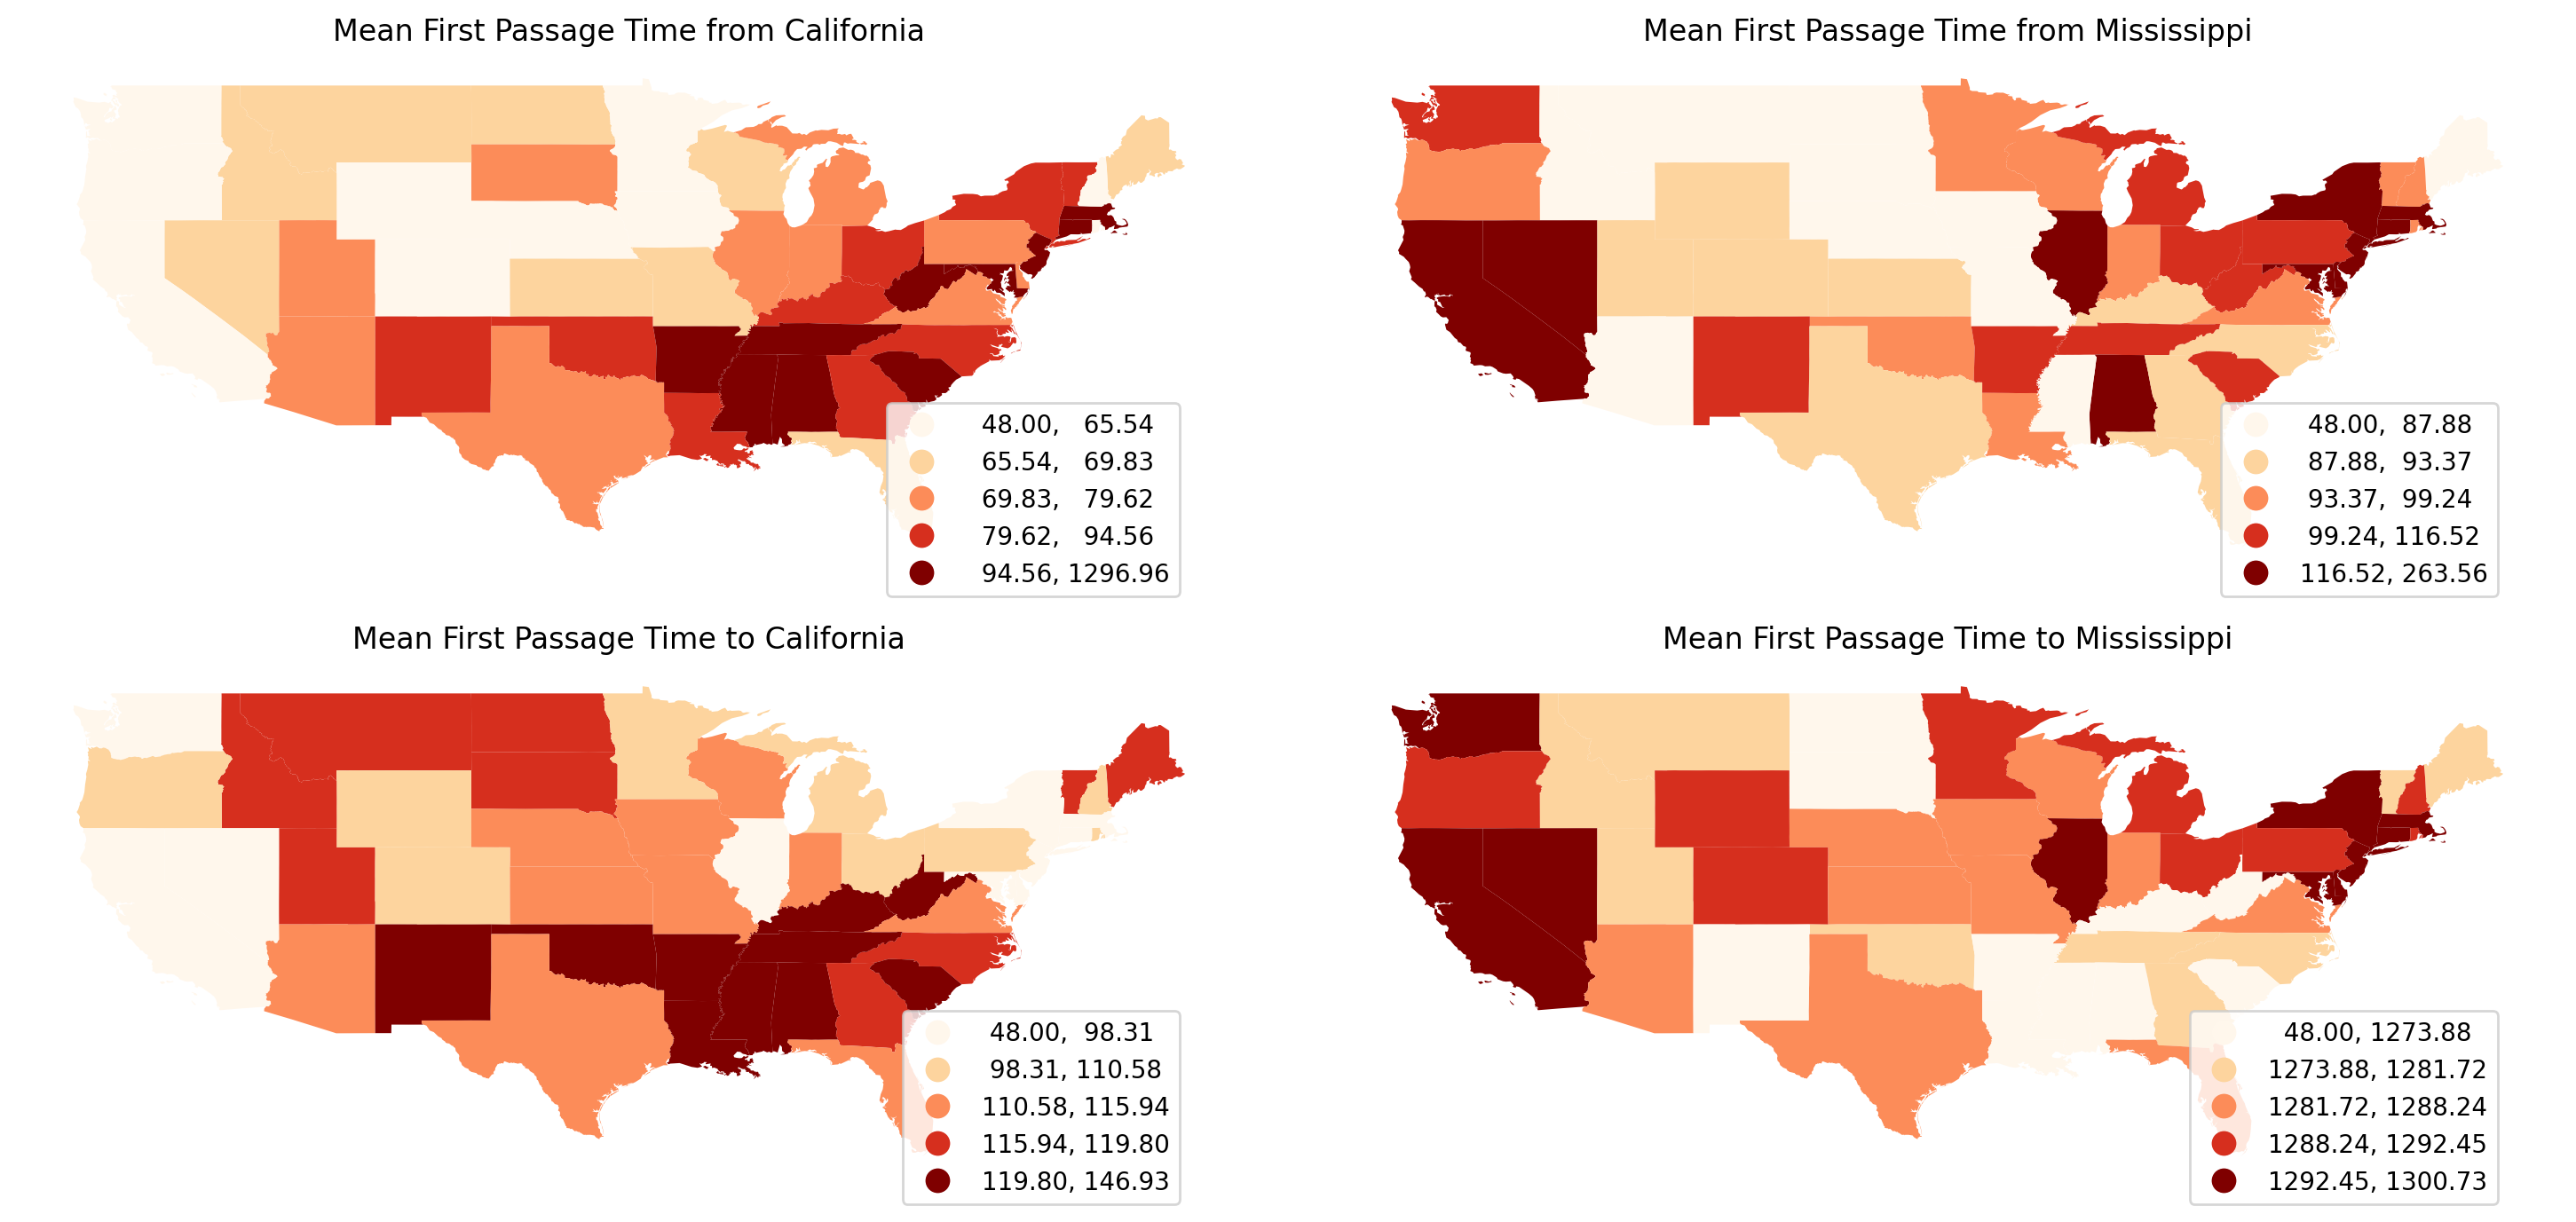

In [22]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # ignore geopandas/plotting.py:732:
    # FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 7))
    target_states = ["California", "Mississippi"]
    directions = ["from", "to"]
    plt_kws = dict(cmap="OrRd", scheme="quantiles", legend=True)
    for i, direction in enumerate(directions):
        for j, target in enumerate(target_states):
            ax = axes[i, j]
            col = f"{direction}_{target}"
            complete_table.plot(ax=ax, column=f"geo_mfpt_{col}", **plt_kws)
            ax.set_title(f"Mean First Passage Time {direction} {target}")
            ax.axis("off")
            leg = ax.get_legend()
            leg.set_bbox_to_anchor((0.8, 0.15, 0.16, 0.2))
    plt.tight_layout()

Visualizing sojourn time for each US state:

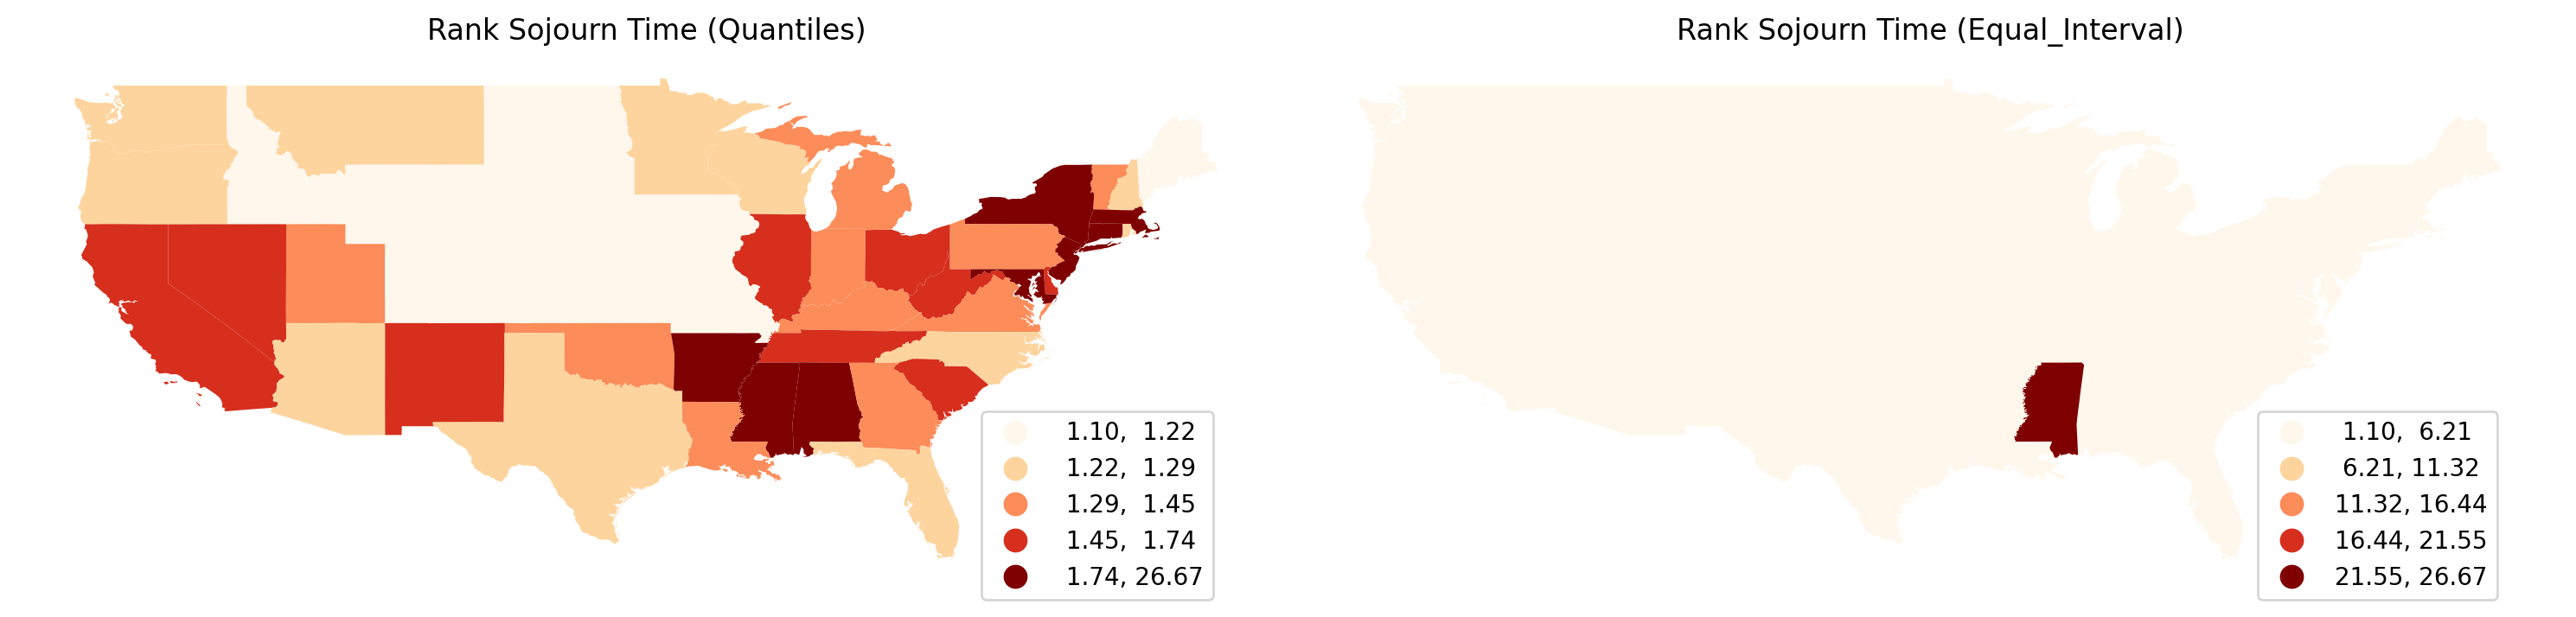

In [23]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # ignore geopandas/plotting.py:732:
    # FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version.

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7))
    schemes = ["Quantiles", "Equal_Interval"]
    plt_kws = dict(cmap="OrRd", legend=True, column="geo_sojourn_time")
    for i, scheme in enumerate(schemes):
        ax = axes[i]
        complete_table.plot(ax=ax, scheme=scheme, **plt_kws)
        ax.set_title(f"Rank Sojourn Time ({scheme})")
        ax.axis("off")
        leg = ax.get_legend()
        leg.set_bbox_to_anchor((0.8, 0.15, 0.16, 0.2))
    plt.tight_layout()